In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
structure = pd.read_csv("/Yang Deng/Study_Work/Work/Resume/2017-2018/Data Scientist/Data Incubator/building_damage_assessment/csv_building_structure.csv")
structure.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,...,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
0,70102000011,7,701,70102,1,1,28,454,9,9,...,0,0,1,1,0,0,1,Damaged-Repaired and used,Grade 2,Minor repair
1,70102000021,7,701,70102,1,1,32,324,9,9,...,0,0,1,1,0,0,1,Damaged-Repaired and used,Grade 2,Minor repair
2,70102000031,7,701,70102,2,2,34,456,18,18,...,0,0,1,1,0,0,1,Damaged-Repaired and used,Grade 3,Major repair
3,70103000011,7,701,70103,2,2,20,452,18,18,...,0,0,1,1,0,0,1,Damaged-Repaired and used,Grade 3,Major repair
4,70103000021,7,701,70103,1,0,25,542,9,0,...,0,0,1,1,0,0,1,Damaged-Rubble unclear,Grade 5,Reconstruction


In [8]:
# Examine damage_grades in the structure data set:
structure.damage_grade.unique()
damage_grades = structure.groupby(['damage_grade']).size().reset_index(name='counts')
# Found out that there are 12 records out of 1052948 records that damage_grade is unknown. 
# For simplicity I simply put them into Grade 1. 

,damage_grade,counts
0,Grade 1,101818
1,Grade 2,141996
2,Grade 3,204179
3,Grade 4,253135
4,Grade 5,351808


In [10]:
structure.damage_grade.unique()

array(['Grade 2', 'Grade 3', 'Grade 5', 'Grade 4', 'Grade 1', nan],
      dtype=object)

In [109]:
data = structure[['district_id','count_floors_pre_eq', 'count_floors_post_eq','age_building','plinth_area_sq_ft','height_ft_pre_eq','height_ft_post_eq','damage_grade']]
data.damage_grade.unique()

array(['Grade 2', 'Grade 3', 'Grade 5', 'Grade 4', 'Grade 1', nan],
      dtype=object)

In [118]:
def convertDamageGrade(data):
    if data['damage_grade']== 'Grade 1'or data['damage_grade'] == np.nan:
        return 1
    elif data['damage_grade'] == 'Grade 2':
        return 2
    elif data['damage_grade'] == 'Grade 3':
        return 3
    elif data['damage_grade'] == 'Grade 4':
        return 4
    else: 
        return 5
    
data['damage_grade_num'] = data.apply(convertDamageGrade, axis=1)

/Users/yangdeng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


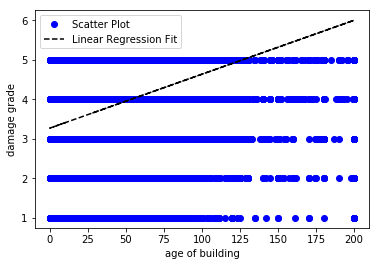

In [67]:
#Found there is a value 999 for age_building, which should mean very high
data1 = data.loc[data['age_building'] < 999]
y1 = data1['damage_grade_num']
x1 = data1['age_building']

m,b = np.polyfit(x1,y1,1)

plt.plot(x1, y1, 'bo', label = "Scatter Plot")
plt.plot(x1, m*x1+b, '--k', label = "Linear Regression Fit") 
plt.legend(loc='upper left')
plt.xlabel("age of building")
plt.ylabel("damage grade")
plt.show()

## The 1st Plot

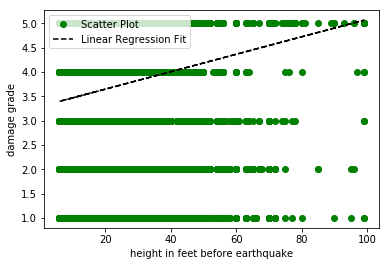

In [68]:
# Found there are outliers for height_ft_pre_eq, which should mean that the building is very high or just a mistak
#data['height_ft_pre_eq'].unique() show shat these ourliers are buildings taller than 200 feet
data2 = data.loc[data['height_ft_pre_eq'] < 200]
data2['height_ft_pre_eq'].unique()
y2 = data2['damage_grade_num']
x2 =data2['height_ft_pre_eq']
m,b = np.polyfit(x2,y2,1)

plt.plot(x2, y2, 'go', label = "Scatter Plot")
plt.plot(x2, m*x2+b, '--k', label = "Linear Regression Fit") 
plt.legend(loc='upper left')
plt.xlabel("height in feet before earthquake")
plt.ylabel("damage grade")
plt.show()

In [70]:
data['district_id'].unique()

array([ 7,  9, 10, 11, 13, 35, 37, 38, 39, 40, 43, 44, 45, 46, 47, 48, 51,
       26, 27, 25, 12, 20, 21, 22, 23, 24, 28, 29, 30, 31, 36])

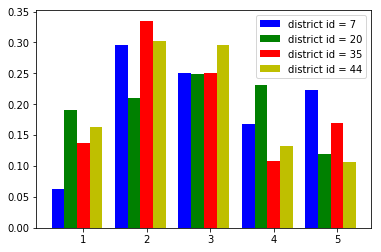

In [108]:
#seperate data into different districts and see the distributions of damage grade within each district
district7 = data.loc[data['district_id'] == 7]
district35 = data.loc[data['district_id'] == 35]
district20 = data.loc[data['district_id'] == 20]
district44= data.loc[data['district_id'] == 44]

district7.groupby(['damage_grade_num']).size()

def damageGradeCounts(data):
    l1, l2 = len(data.loc[data['damage_grade_num'] == 1]), len(data.loc[data['damage_grade_num'] == 2])
    l3, l4 = len(data.loc[data['damage_grade_num'] == 3]), len(data.loc[data['damage_grade_num'] == 4])
    l5, size = len(data.loc[data['damage_grade_num'] == 5]), len(data)
    return [l1/size,l2/size,l3/size,l4/size,l5/size]
y7 = damageGradeCounts(district7)
y20 =damageGradeCounts(district20)
y35 =damageGradeCounts(district35)
y44 =damageGradeCounts(district44)

x = np.array([1,2,3,4,5])
ax = plt.subplot(111)
ax.bar(x-0.4, y7,width=0.2,color='b',align='center', label = "district id = 7")
ax.bar(x-0.2, y20,width=0.2,color='g',align='center', label = "district id = 20")
ax.bar(x, y35,width=0.2,color='r',align='center', label = "district id = 35")
ax.bar(x+0.2, y44,width=0.2,color='y',align='center', label = "district id = 44")
plt.legend(loc='upper right')
plt.show()

## The 2nd plot